# 1. Introduction

## 1.1 The Data Science Interview

A few months ago, Tanya Cashorali from TCB Analytics sat down with Datacamp for a very interesting [webinar](https://support.datacamp.com/hc/en-us/articles/360019081553-Feb-2019-Webinar-How-to-hire-and-test-for-data-skills-A-one-size-fits-all-interview-kit) discussing the ins-and-outs of data science interviews. There were a few key insights: 

1. Demand for data scientists has led to some unrealistic expectations regarding the necessary qualifications of candidates. 
2. Data science is a highly integrated discipline. This means candidates will have diverse professional backgrounds. 
3. Interviewing candidates with diverse backgrounds is challenging and requires a way of "quantifying technical and cultural fit". Old-school interview techniques such as *whiteboarding* are apparently not effective. 
4. A data analysis exercise can quantify company fit by revealing how candidates with different backgrounds and abilities approach the same problem.

## 1.2 The Take-Home Test

The main idea here is to use a *not-too-huge* dataset that allows for different approaches towards solving the same problem. Interviewers want to know if you can do the following: 

- Get the data
- Explore the data
- Wrangle the data
- Visualize the data
- Explain the data 

# 2. Set Up

## 2.1 Load Libraries

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)

# Initiate plotly
init_notebook_mode(connected=True) #do not miss this line

## 2.2 Load Data

In [2]:
# Load flat file (Kaggle)
reviews_raw = pd.read_csv('../input/beer_reviews.csv')

# Load flat file from GDrive
#reviews_raw = pd.read_csv('/content/gdrive/My Drive/Python/Projects/Beer Reviews/beer_reviews.csv')

#reviews_raw = pd.read_csv('https://query.data.world/s/gib6aa6n3tmtuvrqpbdlhcbgdg7tk4')

# Best Practice: Make a copy of the raw data to work on
reviews = reviews_raw.copy()

# Peep it
reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


Things to Look For: 

- Types of data
- Missing data
- Duplicate data 
- Unsuitable data

# 3. Exploratory Analysis

## 3.1 Types of Data

In [3]:
# Convert 'object' to 'category' 
reviews[reviews.select_dtypes(['object']).columns] = reviews.select_dtypes(['object']).\
                                                         apply(lambda x: x.astype('category'))

# Examine structure 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null category
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null category
beer_style            1586614 non-null category
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null category
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: category(4), float64(6), int64(3)
memory usage: 130.2 MB


> *The dataset now contains a mix of numeric and categorical variables.*

## 3.2 Missing Data

### 3.2.1 Count Null Values

In [4]:
# Check for null values
print(reviews.isnull().sum())

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


### 3.2.2 Percent Null Values

In [5]:
# Percent of data missing `beer_abv` values
print("Percent Null Values of `beer_abv` column:", round(67785 / 1586614 * 100, 2),"%")

Percent Null Values of `beer_abv` column: 4.27 %


### 3.2.3 Drop Null Values

In [6]:
# Drop null row values
reviews = reviews.dropna()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1518478 non-null int64
brewery_name          1518478 non-null category
review_time           1518478 non-null int64
review_overall        1518478 non-null float64
review_aroma          1518478 non-null float64
review_appearance     1518478 non-null float64
review_profilename    1518478 non-null category
beer_style            1518478 non-null category
review_palate         1518478 non-null float64
review_taste          1518478 non-null float64
beer_name             1518478 non-null category
beer_abv              1518478 non-null float64
beer_beerid           1518478 non-null int64
dtypes: category(4), float64(6), int64(3)
memory usage: 136.4 MB


> *Removing all null values only impacts the size of the dataset by a little over 4%.*

In [7]:
# Check for null values
print(reviews.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


## 3.3 Duplicate Data

If a user has rated the same beer more than once, then only keep their highest rating.

In [8]:
# Sort by user overall rating first
reviews = reviews.sort_values('review_overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
reviews = reviews.drop_duplicates(subset= ['review_profilename','beer_name'], keep='first')

# Peep structure
reviews.info()

# Percent of data that are duplicates
print("Percent of Duplicate Values:", round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496263 entries, 1586613 to 39648
Data columns (total 13 columns):
brewery_id            1496263 non-null int64
brewery_name          1496263 non-null category
review_time           1496263 non-null int64
review_overall        1496263 non-null float64
review_aroma          1496263 non-null float64
review_appearance     1496263 non-null float64
review_profilename    1496263 non-null category
beer_style            1496263 non-null category
review_palate         1496263 non-null float64
review_taste          1496263 non-null float64
beer_name             1496263 non-null category
beer_abv              1496263 non-null float64
beer_beerid           1496263 non-null int64
dtypes: category(4), float64(6), int64(3)
memory usage: 134.5 MB
Percent of Duplicate Values: 1.46 %


> *Removing all duplicate values drops about 1.5% of the remaining data.*

## 3.4 Overview of Numeric Features

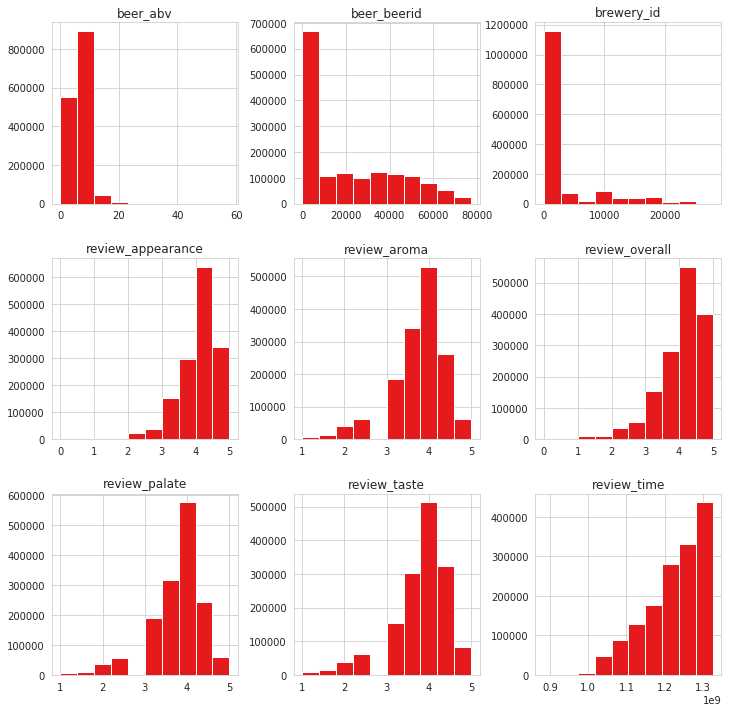

In [9]:
# Histogram of all numeric features
reviews.hist(figsize=(12,12))
plt.show()

|Numeric Variable| Distribution|Interpretation|
|---|---|---|
|`beer_abv`| Skewed right | Most beers are less than 20% ABV|
|`beer_beerid`| Skewed right | Lower IDs have more reviews than higher IDs|
|`brewery_id`| Skewed right| Lower IDs have more reviews than higher IDs|
|`review_appearance`|Skewed left| Most beers rated 4 and higher|
|`review_aroma`| Normal | Most beers rated between 3 and 4|
|`review_overall`|Skewed left| Most beers rated 4 and higher|
|`review_palate`|Normal| Most beers rated between 3 and 4|
|`review_taste`|Normal| Most beers rated between 3.5 and 4.5 |
|`review_time`|Skewed left| Num of beers rated vs time suggests linearity|

> *Also note the existence of ratings which have a value of 0 in the* `review_overall` *&* `review_appearance` *columns.*

## 3.5 Ratings of 0

Since ratings are on a scale of 1-5, any values in review variables that are less than 1 are not suitable for analysis. 

In [10]:
# Review scores of >= 1
reviews = reviews[(reviews['review_overall'] >= 1) | \
        (reviews['review_appearance'] >= 1)]

# Check it out
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496256 entries, 1586613 to 1301769
Data columns (total 13 columns):
brewery_id            1496256 non-null int64
brewery_name          1496256 non-null category
review_time           1496256 non-null int64
review_overall        1496256 non-null float64
review_aroma          1496256 non-null float64
review_appearance     1496256 non-null float64
review_profilename    1496256 non-null category
beer_style            1496256 non-null category
review_palate         1496256 non-null float64
review_taste          1496256 non-null float64
beer_name             1496256 non-null category
beer_abv              1496256 non-null float64
beer_beerid           1496256 non-null int64
dtypes: category(4), float64(6), int64(3)
memory usage: 134.5 MB


> *There were only seven reviews with ratings of less than 1 here which is basically negligible. However, it's always a good idea to check for numbers which don't make sense in your dataset.*

## 3.6 Remove Strings

Split `brewery_name` using a delimiter and only keep strings before the split. 

In [11]:
# Split after / & keep only first string
reviews['brewery_name'] = reviews['brewery_name'].str.split(' / ').str[0]

# 4. Questions

## 4.1 Which brewery produces the strongest beers by alcohol beverage percent?

### 4.1.1. Top 10 Strongest Beers by ABV

In [12]:
# Top 10 Beers by ABV
top_10_abv = reviews[['beer_name','brewery_name','beer_abv']].\
    sort_values('beer_abv', ascending=False). \
    drop_duplicates('beer_name').\
    head(10).\
    sort_values('beer_abv', ascending=True)

# Combine brewery and beer name for readability
top_10_abv['combined_name'] = top_10_abv['brewery_name'].str.\
  cat(top_10_abv['beer_name'], sep=' : ')

# Plot it
p = [go.Bar(x = top_10_abv['beer_abv'] / 100,
            y = top_10_abv['beer_name'],
            hoverinfo = 'x',
            text=top_10_abv['brewery_name'],
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Top 10 Strongest Beers by ABV',
                   xaxis=dict(title="ABV",
                              tickformat = "%",
                              hoverformat = '.2%'),
                   margin = dict(l = 220),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *The strongest beer produced is 57.7% ABV produced by Schorschbrau. We can’t rule out the extremely slight possibility that the actual strongest beer is one with a null value in column `beer_abv`.*

### 4.1.2 Top 10 Breweries by Highest Mean ABV



In [13]:
# Use only unique beers and breweries for aggregate stats
abv = reviews[['beer_name','brewery_name','beer_abv']]\
    .drop_duplicates(['beer_name','brewery_name'])\
    .pivot_table(index="brewery_name", aggfunc=("count",'mean','median'))

# Adjust column names
abv.columns = abv.columns.to_series().str.join('_')

# Reset index
abv.reset_index(inplace=True)

# Rename column
abv.rename(columns={'beer_abv_count':'beer_count'}, inplace=True)

# Filter for breweries with at least 4 unique beers
abv_filtered_mean = abv.query('beer_count >= 4')\
    .sort_values('beer_abv_mean', ascending=False)\
    .head(10)\
    .sort_values('beer_abv_mean', ascending=True)

# Plot it
p1 = [go.Bar(x = abv_filtered_mean['beer_abv_mean'] / 100,
             y = abv_filtered_mean['brewery_name'],
             text=abv_filtered_mean['beer_abv_mean'].round(1),
             hoverinfo='x',
             textposition = 'inside',
             orientation = 'h',
             opacity=0.7, 
             marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Top 10 Breweries by Highest Mean ABV',
                   xaxis=dict(title="Mean ABV",
                              tickformat='%',
                              hoverformat = '.2%'),
                   margin = dict(l = 230),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p1, layout=layout)

# Plot it
py.offline.iplot(fig)

### 4.1.3 Top 10 Breweries by Highest Median ABV

In [14]:
# Filter for breweries with at least 4 unique beers
abv_filtered_median = abv.query('beer_count >= 4')\
    .sort_values('beer_abv_median', ascending=False)\
    .head(10)\
    .sort_values('beer_abv_median', ascending=True)

# Plot it
p2 = [go.Bar(x = abv_filtered_median['beer_abv_median'] / 100,
            y = abv_filtered_median['brewery_name'],
            hoverinfo='x',
            text=abv_filtered_median['beer_abv_median'].round(1),
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Top 10 Breweries by Highest Median ABV',
                   xaxis=dict(title="Median ABV",
                              tickformat="%",
                              hoverformat = '.2%'),
                   margin = dict(l = 230),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p2, layout=layout)

# Plot it
py.offline.iplot(fig)

### 4.1.4 Top 10 Breweries by Percent of Beers over 10% ABV

In [15]:
# Drop duplicate breweries & beer names
df = reviews\
    .drop_duplicates(['beer_name','brewery_name'])

# Create column with boolean based on ABV
df['above_10'] = np.where(df['beer_abv'] >= 10, 1, 0)

# Apply function to create percent above threshold of 10
above_10 = pd.DataFrame(df.groupby('brewery_name')['above_10']\
                        .apply(lambda x: sum(x)/len(x)))

# Join percent back with abv 
abv = pd.merge(abv, above_10, on='brewery_name')\
    .sort_values('above_10', ascending=False)

# Filter for breweries with at least 4 unique beers
abv_filtered_above_10 = abv.query('beer_count >= 4')\
    .sort_values('above_10', ascending=False)\
    .head(10)\
    .sort_values('above_10', ascending=True)

# Plot it
p3 = [go.Bar(x = abv_filtered_above_10['above_10'],
            y = abv_filtered_above_10['brewery_name'],
            hoverinfo='x',
            text=abv_filtered_above_10['above_10'].round(2),
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Top 10 Breweries by Percent of Beers over 10% ABV',
                   xaxis=dict(title="ABV",
                              tickformat="%",
                              hoverformat = '.1%'),
                   margin = dict(l = 230),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p3, layout=layout)

# Plot it
py.offline.iplot(fig)

## 4.2 If you had to pick 3 beers to recommend using only this data, which would you pick?

### 4.2.1 Simplest Recommendation

If I were to recommend 3 beers to somebody who is new to beer (i.e. does not have a style preference), then I'd first narrow down to the most popular beers and subsequently find the highest rated beers amongst that subset. 

The idea is that finding a widely-known beer with a high rating increases the chance that your recommendations will be taken more favorably from your audience as opposed to you offering an obscure beer with a high rating. Most people tend to like things that other people like. 

In [16]:
# Pivot table with overall rating
top_3_rec = reviews[['beer_name','review_overall']]\
    .pivot_table(index="beer_name", aggfunc=("count",'mean','median'))\
    .dropna()

# Rename columns and flatten pivot table
top_3_rec.columns = top_3_rec.columns.to_series().str.join('_')
top_3_rec.reset_index(inplace=True)

# Filter for highest rated beers
top_3_rec = top_3_rec.query('review_overall_count >= 1000')\
  .sort_values('review_overall_mean', ascending=False)\
  .head(3)

# Check it out
top_3_rec

,beer_name,review_overall_count,review_overall_mean,review_overall_median
40143,Trappist Westvleteren 12,1272,4.617925,4.5
30704,Pliny The Elder,2432,4.598273,4.5
41974,Weihenstephaner Hefeweissbier,1951,4.517683,4.5


### 4.2.2 Recommendation Engine with PySpark

#### 4.2.2.1 Initiate PySpark

In [17]:
# Initiate PySpark 
!pip install pyspark
!pip install -q findspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# PySpark function
from pyspark.sql.functions import monotonically_increasing_id

    100% |████████████████████████████████| 215.6MB 149kB/s 
    100% |████████████████████████████████| 204kB 35.6MB/s 
  Stored in directory: /tmp/.cache/pip/wheels/8d/20/f0/b30e2024226dc112e256930dd2cd4f06d00ab053c86278dcf3
Successfully built pyspark
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### 4.2.2.2 Create & Join DataFrames

In [18]:
# Create Pandas DF of ratings by user and item
ratings = reviews[['review_profilename', 'beer_name', 'review_overall']]

# Pivot table of user review counts
user_pivot = reviews[['review_profilename', 'beer_name']]\
  .pivot_table(index="review_profilename", aggfunc=("count"))\
  .reset_index()\
  .rename(columns={'beer_name':'user_review_count'})

# Join with ratings 
user_ct = user_pivot.merge(ratings, on='review_profilename', how='inner')

# Pivot table of beer review counts
beer_pivot = user_ct[['beer_name','review_overall']]\
  .pivot_table(index="beer_name", aggfunc=("count"))\
  .reset_index()\
  .rename(columns={'review_overall':'beer_review_count'})

# Join with merged user review counts / ratings
user_beer_ct = user_ct.merge(beer_pivot, on='beer_name', how='inner')

# Filter for user_review_count >= 50 & beer_review_count >= 100 
filt_user_beer_ct = user_beer_ct[(user_beer_ct['user_review_count'] >= 50) & \
                   (user_beer_ct['beer_review_count'] >= 100)]

# Remove unwanted variables
ratings = filt_user_beer_ct.drop(['user_review_count', 'beer_review_count'], axis=1)

# Convert Pandas mixed data into strings
ratings[['review_profilename', 'beer_name']] = ratings[['review_profilename', 
                                                        'beer_name']].astype(str)

# Rename columns
ratings = ratings.rename(columns = {'review_profilename':'user', 
                                    'review_overall':'rating'})

# Convert Pandas DF to Spark DF
ratings = spark.createDataFrame(ratings)

# Get unique users and repartition to 1 partition
users = ratings.select("user").distinct().coalesce(1)

# Create a new column of unique integers called "user_id" in the users dataframe.
users = users.withColumn("user_id", monotonically_increasing_id()).persist()

# Extract the distinct beer IDs
beers = ratings.select('beer_name').distinct()

# Repartition the data to only one partition
beers = beers.coalesce(1)

# Create a new column of beer_id integers
beers = beers.withColumn("beer_id", monotonically_increasing_id()).persist()

# Join ratings, users, and beers dataframes
beer_ratings = ratings.join(users, "user", "left").join(beers, "beer_name", "left")

# Check it out
beer_ratings.show()

+-------------+-----------+------+-------+-------+
|    beer_name|       user|rating|user_id|beer_id|
+-------------+-----------+------+-------+-------+
|Anvil Ale ESB| BeerManDan|   3.0|     17|      3|
|Anvil Ale ESB|  HopHead84|   3.0|      1|      3|
|Anvil Ale ESB|mikesgroove|   4.5|      5|      3|
|Anvil Ale ESB| beersarang|   4.0|     51|      3|
|Anvil Ale ESB|      jakon|   4.0|     48|      3|
|Anvil Ale ESB|   asabreed|   4.5|     70|      3|
|Anvil Ale ESB|     bcm119|   5.0|     81|      3|
|Anvil Ale ESB|      DrJay|   4.5|     88|      3|
|Anvil Ale ESB|   HalfFull|   4.5|    111|      3|
|Anvil Ale ESB|      rowew|   5.0|    142|      3|
|Anvil Ale ESB|  DrDogbeer|   4.0|    154|      3|
|Anvil Ale ESB|    TexIndy|   3.5|    157|      3|
|Anvil Ale ESB|   mattster|   4.0|    197|      3|
|Anvil Ale ESB|  GClarkage|   4.5|    211|      3|
|Anvil Ale ESB| PhiloPsych|   4.5|    328|      3|
|Anvil Ale ESB|     NCSUdo|   4.5|    375|      3|
|Anvil Ale ESB|cerveza5150|   4

#### 4.2.2.3 Review Schema

If a dataset includes ratings from users, then these ratings are considered *explicit*, not *implicit*. 

In [19]:
# Select relevant columns & convert the columns to the proper data types
beer_tbl = beer_ratings.select(beer_ratings.user_id.cast("integer"), 
                         beer_ratings.beer_id.cast("integer"), 
                         beer_ratings.rating.cast("double"))

# Use the .printSchema() method to see the datatypes of the ratings dataset.
beer_tbl.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- beer_id: integer (nullable = true)
 |-- rating: double (nullable = true)



#### 4.2.2.4 Sparsity

How much of the matrix is empty?

In [20]:
# Count the total number of ratings in the dataset
numerator = beer_tbl.select("rating").count()

# Count the number of distinct user_ids and distinct beer_ids
num_users = beer_tbl.select("user_id").distinct().count()
num_beers = beer_tbl.select("beer_id").distinct().count()

# Set the denominator equal to the number of users multiplied by the number of beers
denominator = num_users * num_beers

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator *1.0)/denominator)*100
print ("The beer_tbl dataframe is", "%.2f" % sparsity + "% empty.")

The beer_tbl dataframe is 93.34% empty.


> *The matrix is sparse as expected.*

#### 4.2.2.5 Summary Statistics

In [21]:
import pyspark.sql.functions as f

# Min num ratings for beers
print("Beer with the fewest ratings: ")
beer_tbl.groupBy("beer_id").count().select(f.min("count")).show()

# Max num ratings for beers
print("Beer with the most ratings: ")
beer_tbl.groupBy("beer_id").count().select(f.max("count")).show()

# Avg num ratings per beer
print("Avg num ratings per beer: ")
beer_tbl.groupBy("beer_id").count().select(f.avg("count")).show()

# Min num ratings for users
print("User with the fewest ratings: ")
beer_tbl.groupBy("user_id").count().select(f.min("count")).show()

# Max num ratings for users
print("User with the most ratings: ")
beer_tbl.groupBy("user_id").count().select(f.max("count")).show()

# Avg num ratings per users
print("Avg num ratings per user: ")
beer_tbl.groupBy("user_id").count().select(f.avg("count")).show()

Beer with the fewest ratings: 
+----------+
|min(count)|
+----------+
|        74|
+----------+

Beer with the most ratings: 
+----------+
|max(count)|
+----------+
|      2303|
+----------+

Avg num ratings per beer: 
+------------------+
|        avg(count)|
+------------------+
|313.31090790333116|
+------------------+

User with the fewest ratings: 
+----------+
|min(count)|
+----------+
|        10|
+----------+

User with the most ratings: 
+----------+
|max(count)|
+----------+
|      2338|
+----------+

Avg num ratings per user: 
+------------------+
|        avg(count)|
+------------------+
|203.98851796725495|
+------------------+



#### 4.2.2.6 Train-Test-Split

In [22]:
# Import libraries
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

# Split the ratings dataframe into training and test data
(training_data, test_data) = beer_tbl.randomSplit([0.8, 0.2], seed=1234)

#### 4.2.2.7 Train ALS Model

In [23]:
# Create ALS model: for CV
als_cv = ALS(userCol="user_id", 
          itemCol="beer_id", 
          ratingCol="rating", 
          nonnegative = True, 
          implicitPrefs = False,
          coldStartStrategy="drop") 

# Create ALS model: no CV
als = ALS(userCol="user_id", 
          itemCol="beer_id", 
          ratingCol="rating", 
          rank =10, 
          maxIter =15, 
          regParam = 0.1,
          coldStartStrategy="drop", 
          nonnegative =True, 
          implicitPrefs = False)

# Fit the model to the training_data
model = als.fit(training_data)

# Generate predictions on the test_data
test_predictions = model.transform(test_data)
           
# Define evaluator as RMSE and print length of evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction") 

# Calculate and print the RMSE of the test_predictions
RMSE = evaluator.evaluate(test_predictions)
print(RMSE)

0.5808477228167259


> *On average, our model predicts 0.58 above or below values of the original ratings matrix.*

#### 4.2.2.8 Cross Validation

Cross validation is too computationally expensive and will not be utilized.

In [24]:
#### Cross Validation 
# Import the requisite items
#from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Add hyperparameters and their respective values to param_grid
# Let Spark know which combos of hyperparameters to try and how to evaluate them.
#param_grid = ParamGridBuilder() \
          #  .addGrid(als.rank, [10, 20, 50]) \
          #  .addGrid(als.maxIter, [5, 20, 50]) \
          #  .addGrid(als.regParam, [0.01, 0.05, 0.1,]) \
          #  .build()

#print("Num models to be tested: ", len(param_grid))

# Build cross validator
#cv = CrossValidator(estimator=als, estimatorParamMaps=param_grid, evaluator= evaluator, numFolds=3)

# Fit cross validator to the 'training_data' 
#model_cv = cv.fit(training_data)

# Extract best model from the cv model above
#best_model = model_cv.bestModel

# Create test predictions
#test_predictions = best_model.transform(test_data)

# Calculate and print the RMSE of the test_predictions
#RMSE = evaluator.evaluate(test_predictions)

#### 4.2.2.9 Make Recommendations

In [25]:
# Generate n recommendations for all users
ALS_recommendations = model.recommendForAllUsers(10)

# Create temporary table
ALS_recommendations.registerTempTable("ALS_recs_temp")

# Clean up output, explode it, extract lateral view as separate columns
clean_recs = spark.sql("SELECT user_id, beer_ids_and_ratings.beer_id AS beer_id,\
                                beer_ids_and_ratings.rating AS prediction \
                       FROM ALS_recs_temp\
                       LATERAL VIEW explode(recommendations) \
                       exploded_table AS beer_ids_and_ratings")

# Filter for beers that each user has not consumed before
recommendations = clean_recs.join(beer_ratings.select('user_id', 'beer_id', 'rating'), 
                ['user_id','beer_id'], "left")\
                .filter(beer_ratings.rating.isNull()).drop('rating')\
                .join(beer_ratings.select('beer_id','beer_name'), ['beer_id'], "left")\
                .distinct()

# Check it out
recommendations.show()

+-------+-------+----------+--------------------+
|beer_id|user_id|prediction|           beer_name|
+-------+-------+----------+--------------------+
|   1526|   2674| 3.9462538|Weihenstephaner H...|
|   1526|   2555| 4.7880626|Weihenstephaner H...|
|    215|    753| 4.6127753|          Citra DIPA|
|    215|   4340| 4.3683834|          Citra DIPA|
|    215|   4669|  4.145572|          Citra DIPA|
|    215|     78| 4.8404727|          Citra DIPA|
|    215|   3327| 4.2105064|          Citra DIPA|
|    215|   4485|  4.507652|          Citra DIPA|
|    215|   2518| 4.2257257|          Citra DIPA|
|    215|    399|  4.485832|          Citra DIPA|
|    215|   4390| 4.9583287|          Citra DIPA|
|    215|    376| 4.5447874|          Citra DIPA|
|    215|   1838| 4.3302727|          Citra DIPA|
|    215|   3138| 4.2989206|          Citra DIPA|
|    215|   2823|  4.315342|          Citra DIPA|
|    215|    728|  4.574985|          Citra DIPA|
|    215|   3412|  4.389996|          Citra DIPA|


#### 4.2.2.10 Test Recommendations

In [26]:
# Import col function to filtering
from pyspark.sql.functions import col

# Look at user 62's actual beer ratings
print ("User 62's Ratings:")
beer_ratings.filter(col("user_id") == 62).sort("rating", ascending = False).show()

User 62's Ratings:
+--------------------+--------------+------+-------+-------+
|           beer_name|          user|rating|user_id|beer_id|
+--------------------+--------------+------+-------+-------+
|Collaboration Ser...|LieutenantSour|   5.0|     62|    334|
|            Parabola|LieutenantSour|   4.5|     62|   2524|
|        Supplication|LieutenantSour|   4.5|     62|   2090|
|Bourbon County Br...|LieutenantSour|   4.5|     62|   1398|
|Stone 12th Annive...|LieutenantSour|   4.5|     62|   1799|
|     Serpent's Stout|LieutenantSour|   4.5|     62|    642|
|Founders Breakfas...|LieutenantSour|   4.5|     62|   2376|
|           The Abyss|LieutenantSour|   4.5|     62|   3031|
|Stone Imperial Ru...|LieutenantSour|   4.5|     62|   1216|
|     Pliny The Elder|LieutenantSour|   4.5|     62|   2089|
|Lips Of Faith - L...|LieutenantSour|   4.5|     62|    223|
|          Citra DIPA|LieutenantSour|   4.5|     62|    215|
|Tröegs Hopback Am...|LieutenantSour|   4.5|     62|   1372|
|    

In [27]:
# Look at the beers recommended to user 62
print ("User 62's Recommendations:")
recommendations.filter(col("user_id") == 62).show()

User 62's Recommendations:
+-------+-------+----------+--------------------+
|beer_id|user_id|prediction|           beer_name|
+-------+-------+----------+--------------------+
|   1866|     62| 4.3160677|   Pliny The Younger|
|   1580|     62| 4.3116975|     Duck Duck Gooze|
|   1231|     62|  4.351832|Trappist Westvlet...|
|   2741|     62| 4.3961935|Deviation - Bottl...|
|   2051|     62|  4.329369|Rare Bourbon Coun...|
|   2005|     62| 4.3692784|        Heady Topper|
|    813|     62| 4.3845835|Cantillon Blåbær ...|
|   1906|     62| 4.3367395|Founders CBS Impe...|
+-------+-------+----------+--------------------+



## 4.3 Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

### 4.3.1 Correlation with Target

In [28]:
# Method 1 - Heatmap: Pandas
# List of numeric factors to include
factors = ["review_appearance","review_aroma","review_palate","review_taste", "review_overall"]

# Create a correlation matrix 
corr_metrics = reviews[factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_appearance,review_aroma,review_palate,review_taste,review_overall
review_appearance,1,0.558886,0.564316,0.544445,0.498476
review_aroma,0.558886,1,0.614543,0.714363,0.612488
review_palate,0.564316,0.614543,1,0.731929,0.698807
review_taste,0.544445,0.714363,0.731929,1,0.787072
review_overall,0.498476,0.612488,0.698807,0.787072,1


In [29]:
# Method 2 - Heatmap: Plotly
heat_map_plotly = ff.create_annotated_heatmap(
    z=corr_metrics.values,
    x=list(corr_metrics.columns),
    y=list(corr_metrics.index),
    annotation_text=corr_metrics.round(2).values,
    showscale=True,
    colorscale='Portland',
    font_colors=['white','white'])

layout = go.Layout(title="Correlation Heatmap",
                   margin = dict(l = 330))

fig = go.Figure(data=heat_map_plotly, layout=layout)
py.offline.iplot(fig)

In [30]:
# Method 3 - Bar Chart: Plotly
# Correlation with target review_overall
factor_corr = corr_metrics[['review_overall']]\
    .drop(['review_overall'])\
    .reset_index()\
    .sort_values('review_overall', ascending=True)

# Plot it with Plotly
p4 = [go.Bar(x = factor_corr['review_overall'],
            y = factor_corr['index'],
            hoverinfo='x',
            text=factor_corr['review_overall'].round(2),
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Correlation with Target: review_overall',
                   xaxis=dict(title="Correlation",
                              hoverformat = '.2f'),
                   margin = dict(l = 130),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p4, layout=layout)

# Plot it
py.offline.iplot(fig)

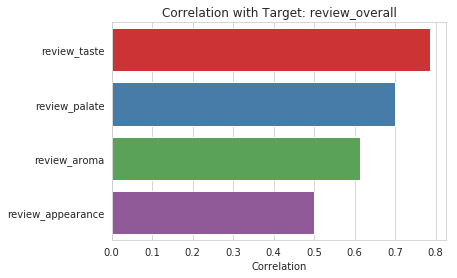

<Figure size 864x576 with 0 Axes>

In [31]:
# Method 4 - Bar Chart: Seaborn
# Plot it with Seaborn just for fun
sns.barplot(data=factor_corr.sort_values('review_overall', ascending=False), y="index",x="review_overall")
plt.ylabel(""); plt.xlabel("Correlation")
plt.title("Correlation with Target: review_overall")
plt.figure(figsize=(12,8))
plt.show()

> *There is high correlation between* `review_taste` *and the target variable* `review_overall`.

### 4.3.2 PCA

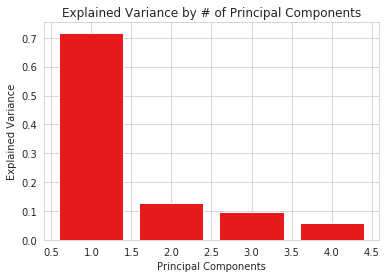

[0.71757711 0.12724795 0.0965185  0.05865644]


In [32]:
# Normalization
# Define our features 
factors = ["review_appearance","review_aroma","review_palate","review_taste"]
features = reviews[factors]

# Define our labels
labels = reviews['review_overall']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

# Note the five features
#print(features.head())

# Note that scaled_train_features are arrays
#print(scaled_train_features)

# Import PCA class
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(1, 5), exp_variance) # Use the number of features 
ax.set_xlabel('Principal Components')
ax.set_title('Explained Variance by # of Principal Components')
ax.set_ylabel('Explained Variance')
plt.show()
print(pca.explained_variance_ratio_)

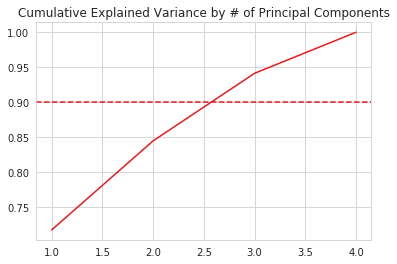

In [33]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(1, 5), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.title('Cumulative Explained Variance by # of Principal Components')
plt.show()

> *It takes about 3 principal components to explain 90.2% of the variance.*

In [34]:
# Bar plot 
p1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,6)],
    y=exp_variance,
    opacity=0.7, 
    marker=dict(color='rgb(1, 87, 155)'),
    name='Individual'
)

# Scatter plot
p2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,6)], 
    y=cum_exp_variance,
    marker=dict(color='rgb(255, 82, 82)'),
    name='Cumulative'
)

data = [p1, p2]

layout=dict(
    title='Explained Variance by Number of Principal Components',
    yaxis=dict(
        title='Explained Variance',
        tickformat="%",
        hoverformat = '.1%'),
    margin = dict(r = 200),
    font=dict(family='Courier New, monospace',
                            color='dark gray'),
    annotations=list([
        dict(x=1.16,
             y=1.05,
             xref='paper',
             yref='paper',
             text='Explained Variance',
             showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)

# Plot it
py.offline.iplot(fig)

> *Although PCA is used mainly for dimensionality reduction, it can also be used to see how many variables explain a given amount of variance.*

## 4.4 If I enjoy a beer due to its aroma and appearance, which beer style should I try?

In [35]:
# Aggregate count & mean for relevant variables
aro_appear = reviews[['beer_style','review_aroma', 'review_appearance','review_overall']]\
    .pivot_table(index="beer_style", aggfunc=('count','mean'))

# Flatten pivot table
aro_appear.columns = aro_appear.columns.to_series().str.join('_')
aro_appear.reset_index(inplace=True)

# Remove redundant '_count' columns
aro_appear.drop(list(aro_appear.filter(regex = 'count')), 
                      axis = 1, 
                      inplace = True)

#aro_appear = aro_appear.drop(['review_appearance_count', 
                                         # 'review_aroma_count'], axis=1)

# Add average of combined aroma and appearance 
aro_appear['aroma_appear_mean'] = (aro_appear['review_appearance_mean'] + 
                              aro_appear['review_aroma_mean']) / 2

# Add absolute average distance from mean 
aro_appear['diff_from_mean'] = abs(aro_appear['review_appearance_mean'] - aro_appear['review_aroma_mean'])

# Sort for plotly 
sort_aro_appear = aro_appear.sort_values('aroma_appear_mean', ascending=False)\
                    .head(10)\
                    .sort_values('aroma_appear_mean',ascending=True)

# Aroma-Appearance Dumbbell Plot Workaround
p1 = go.Scatter(
    x = sort_aro_appear['aroma_appear_mean'],
    y = sort_aro_appear['beer_style'],
    error_x = dict(
        type='data',
        array=sort_aro_appear['diff_from_mean']/2,
        thickness=1.5),
    mode = 'markers',
    name = 'Combined Average',
    marker=dict(
        color='rgba(84, 110, 122, 0.95)',
        line=dict(
            color='rgba(84, 110, 122, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Aroma Rating Dot Plot 
p2 = go.Scatter(
    x = sort_aro_appear['review_aroma_mean'],
    y = sort_aro_appear['beer_style'],
    mode = 'markers',
    name = 'Aroma Average',
    marker=dict(
        color='rgba(229, 57, 53, 0.95)',
        line=dict(
            color='rgba(229, 57, 53, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Appearance Rating Dot Plot
p3 = go.Scatter(
    x = sort_aro_appear['review_appearance_mean'],
    y = sort_aro_appear['beer_style'],
    mode = 'markers',
    name = 'Appearance Average',
    marker=dict(
        color='rgb(1, 87, 155, 0.95)',
        line=dict(
            color='rgba(1, 87, 155, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)


# Set layout
layout=dict(
    title='Top 10 Beer Styles by Combined Appearance/Aroma Average',
    xaxis=dict(
        showline=True,
        showticklabels=True,
        ticks='outside',
        title='Rating',
        hoverformat = '.2f',
        autorange=True,
        showgrid=False,),
    margin = dict(l = 250),
    font=dict(family='Courier New, monospace', color='dark gray'),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='bottom',
        xanchor='right',
    ),
    hovermode='closest'
)


# Plot it
fig = go.Figure(data=[p1,p2,p3], layout=layout)
py.offline.iplot(fig)